<a href="https://colab.research.google.com/github/ftk1000/w2v_ftk1000/blob/master/Copy_of_w2v_tf_fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# w2v QUICK DEMO

In [3]:
# w2v_tf_fast
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from keras import models
from keras import layers 
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import time
import re   # p = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', p)

def get_padding(x):
  return (np.max(x)-np.min(x))/20


def plot_words(w2v_df, ttl):
  # plot words according to their embedding
  x1 = np.array(w2v_df['x1'])
  x2 = np.array(w2v_df['x2'])
  # wrd = 
  x_axis_min, x_axis_max = np.min(x1)-get_padding(x1), np.max(x1)+get_padding(x1)
  y_axis_min, y_axis_max = np.min(x2)-get_padding(x2), np.max(x2)+get_padding(x2)

  plt.close()
  fig, ax = plt.subplots()
  plt.rcParams["figure.figsize"] = (10,10)
  # plt.figure(figsize=(10,10))

  plt.scatter(x1, x2, c='red', s=500, alpha=0.3)
  # plt.text(x1+.03, x2+.03, np.asarray(w2v_df['word']), fontsize=9)
  for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    if word != 'кичлам':
      ax.annotate(word, (x1,x2 ), fontsize=14, color='blue')
      
  ix  =  w2v_df['word']=='кичлам'
  [_,w,wx1,wx2] = np.asarray(w2v_df.loc[ix])[0]
  ax.annotate(w, (wx1,wx2 ), fontsize=16, color='red')

  plt.xlim(x_axis_min,x_axis_max)
  plt.ylim(y_axis_min,y_axis_max)
  plt.title(ttl, fontsize=18)
  plt.show()

def show_weights(model):
  print('WEIGHT MATRICES:')
  for layer in model.layers:
      weights = layer.get_weights() # list
      print(weights[0].shape)
      print(weights[0])

  print('\n\nBIASES:')
  for layer in model.layers:
      bias = layer.bias # list
      print(bias.shape)
      print(bias)    

def show_weights_v2(model, format='rounded'):
  W0=(model.layers[0].get_weights()[0])
  W1=(model.layers[1].get_weights()[0])
  b0 = np.asarray(model.layers[0].bias).astype(float)
  b1 = np.asarray(model.layers[1].bias).astype(float)
  if format=='rounded':
    print("W0=",np.round(W0,1))
    print("W1=",np.round(W1,1))
    print("b0=",np.round(b0,1))
    print("b1=",np.round(b1,1))
  else:
    print("W0=",W0)
    print("W1=",W1)
    print("b0=",b0)
    print("b1=",b1)


In [6]:
def plot_words_v2( vocab, model, ttl ):
  # read weigfth from the model and plot words as vectors for W0 and W1
  W0,W1,b0,b1 = get_weights(model)
  # print("b0=",np.round(b0,2), "   b1=",np.round(b1,2))

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  fig.tight_layout(pad=5.0)

  fig.suptitle(ttl,  fontsize=18)
  # plt.rcParams["figure.figsize"] = (10,10)
 
  # plot words according to their embedding
  W=W0
  x1, x2    =    W[:,0], W[:,1]
  x_axis_min, x_axis_max = np.min(x1)-get_padding(x1), np.max(x1)+get_padding(x1)
  y_axis_min, y_axis_max = np.min(x2)-get_padding(x2), np.max(x2)+get_padding(x2)

  ax1.scatter(x1, x2, c='red', s=500, alpha=0.3)
  for word, x1i, x2i in zip(vocab, x1, x2):
    if word != 'кичлам':
      ax1.annotate(word, (x1i,x2i ), fontsize=14, color='blue')
    else:
      ax1.annotate(word, (x1i,x2i ), fontsize=16, color='red')
  ax1.set_title('W0', fontsize=18)

  
  W=W1.transpose()
  x1, x2    =    W[:,0], W[:,1]
  x_axis_min, x_axis_max = np.min(x1)-get_padding(x1), np.max(x1)+get_padding(x1)
  y_axis_min, y_axis_max = np.min(x2)-get_padding(x2), np.max(x2)+get_padding(x2)

  ax2.scatter(x1, x2, c='red', s=500, alpha=0.3)
  for word, x1i, x2i in zip(vocab, x1, x2):
    if word != 'кичлам':
      ax2.annotate(word, (x1i,x2i ), fontsize=14, color='blue')
    else:
      ax2.annotate(word, (x1i,x2i ), fontsize=16, color='red')
      
  ax2.set_title('W1', fontsize=18)  

In [7]:
# plot_words_v2( vocab, W0, W1, ttl='Stating point' )

In [8]:
text = "Балерина вдохновляет девочку. КИЧЛАМ сильный и ловкий. Штангист сильный мужчина. Балерина красивая женщина. Юниор ловкий штангист. \
Юниор молодой мужчина. Девочку учит балерина. "

# text = "Балерина вдохновляет девочку. КИЧЛАМ ловкий, и у него есть сила. Мужчина - штангист, он - сила. Эта женщина - балерина, она красивая. \
# Этот юниор - начинающий штангист. Юниор молодой мужчина. Девочку учит балерина."

# corpus = [s.lower().strip().split() for s in re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', text)[0].split('.')[:-1] ]
corpus = [s.lower().replace('- ','').replace(',','').strip() for s in re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', text)[0].split('.')[:-1] ]
# corpus

In [9]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be', 'и', 'он', 'этот', 'она']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)
corpus

['балерина вдохновляет девочку',
 'кичлам сильный ловкий',
 'штангист сильный мужчина',
 'балерина красивая женщина',
 'юниор ловкий штангист',
 'юниор молодой мужчина',
 'девочку учит балерина']

# Create VOCABULARY, count words

In [10]:
sentences = [s.split(' ') for s in corpus]
word_count = {}
vocab=[]
for ss in sentences:
  # print(ss)
  vocab += ss
vocab = sorted(set(vocab))

# initialize word_count dictionary
word_count = {}
for w in vocab:
  word_count[w]=0

Num_all_words=0
for w in vocab:
  for ss in sentences:
    Num_all_words += len(ss)
    for sw in ss:
      if sw==w:
        word_count[w] += 1
# Num_all_words = sum(list(word_count.values()))
df_vocab = pd.DataFrame({'word': list(word_count.keys()),   'count': list(word_count.values())})
df_vocab['freq'] = df_vocab['count']/np.sum(df_vocab['count'])
# df_vocab

In [11]:
# sentences = [s.split(' ') for s in corpus]

# vocab=[]
# for ss in sentences:
#   vocab += ss
# vocab = sorted(set(vocab))

# initialize dictionary of context words
context_words = {}
for w in vocab:
  context_words[w] = []

word2int = {}
for i,word in enumerate(vocab):
    word2int[word] = i
# print('word2int=', word2int)

WINDOW_SIZE = 2
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
                context_words[word].append(neighbor)

df_context_words = pd.DataFrame({'word': list(context_words.keys()),   'c_words': list(context_words.values())})
df_context_words['num_c_words_pairs'] = [ len(wrds) for wrds in list(context_words.values()) ]
df_context_words['set_c_words'] = [ set(wrds) for wrds in list(context_words.values()) ]
df_context_words['num_c_words'] = [ len(set(wrds)) for wrds in list(context_words.values()) ]
# df_context_words


In [12]:
df_vocab = df_vocab.merge( df_context_words, how='outer',on=['word'] )
df_vocab

,word,count,freq,c_words,num_c_words_pairs,set_c_words,num_c_words
0,балерина,3,0.142857,"[вдохновляет, девочку, красивая, женщина, дево...",6,"{девочку, женщина, красивая, учит, вдохновляет}",5
1,вдохновляет,1,0.047619,"[балерина, девочку]",2,"{балерина, девочку}",2
2,девочку,2,0.095238,"[балерина, вдохновляет, учит, балерина]",4,"{учит, вдохновляет, балерина}",3
3,женщина,1,0.047619,"[балерина, красивая]",2,"{балерина, красивая}",2
4,кичлам,1,0.047619,"[сильный, ловкий]",2,"{сильный, ловкий}",2
5,красивая,1,0.047619,"[балерина, женщина]",2,"{балерина, женщина}",2
6,ловкий,2,0.095238,"[кичлам, сильный, юниор, штангист]",4,"{штангист, сильный, юниор, кичлам}",4
7,молодой,1,0.047619,"[юниор, мужчина]",2,"{мужчина, юниор}",2
8,мужчина,2,0.095238,"[штангист, сильный, юниор, молодой]",4,"{сильный, молодой, юниор, штангист}",4
9,сильный,2,0.095238,"[кичлам, ловкий, штангист, мужчина]",4,"{штангист, ловкий, мужчина, кичлам}",4


# CREATE WORD PAIRS FOR TRAINING

In [13]:
df = pd.DataFrame(data, columns = ['input', 'label'])

print(f'{len(vocab)} слов; СЛОВАРЬ=', vocab)
print( f'Pазмер окна = {WINDOW_SIZE}, {len(df)} контекстные пары слов')
print(sentences)
df.head()
# df.head(n=len(df))

w2idx = pd.DataFrame.from_dict({ 'values': word2int.values(), 'word': word2int.keys() })

print('w2idx.shape=', w2idx.shape)
print('w2idx.head()=', w2idx.head())





ONE_HOT_DIM = len(vocab)
print('ONE_HOT_DIM = ', ONE_HOT_DIM)
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word


# print('df.head()=', df.head())
# print('word2int=', word2int)
# k=0
for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))
    # if k<5:
    #   Xtmp = to_one_hot_encoding(word2int[ x ])
    #   Ytmp = to_one_hot_encoding(word2int[ y ])
    #   print(x,'\t===>',Xtmp, '\t\t\t\t',  y ,'===>',Ytmp)
    #   k+=1

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)
df['X_train']=list(X_train)
df['Y_train']=list(Y_train)
# df.head()
dfint = df.copy()
dfint['X_train']=list(X_train.astype(int))
dfint['Y_train']=list(Y_train.astype(int))

print('dfint.shape=', dfint.shape)
print('dfint.head()=')
dfint.head()

13 слов; СЛОВАРЬ= ['балерина', 'вдохновляет', 'девочку', 'женщина', 'кичлам', 'красивая', 'ловкий', 'молодой', 'мужчина', 'сильный', 'учит', 'штангист', 'юниор']
Pазмер окна = 2, 42 контекстные пары слов
[['балерина', 'вдохновляет', 'девочку'], ['кичлам', 'сильный', 'ловкий'], ['штангист', 'сильный', 'мужчина'], ['балерина', 'красивая', 'женщина'], ['юниор', 'ловкий', 'штангист'], ['юниор', 'молодой', 'мужчина'], ['девочку', 'учит', 'балерина']]
w2idx.shape= (13, 2)
w2idx.head()=    values         word
0       0     балерина
1       1  вдохновляет
2       2      девочку
3       3      женщина
4       4       кичлам
ONE_HOT_DIM =  13
dfint.shape= (42, 4)
dfint.head()=


,input,label,X_train,Y_train
0,балерина,вдохновляет,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,балерина,девочку,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,вдохновляет,балерина,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,вдохновляет,девочку,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,девочку,балерина,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# VISUALIZE

![words_p1.JPG](https://github.com/ftk1000/w2v_ftk1000/blob/master/words_p1.JPG?raw=1)<br>
![words_p2.JPG](https://github.com/ftk1000/w2v_ftk1000/blob/master/words_p2.JPG?raw=1)


In [14]:
# !pip install graphviz
from graphviz import Digraph

# create a graph object
dot = Digraph(comment='words')

for i in range(len(vocab)):
  # word_node = f'word_{i}'
  # dot.node(  word_node,  vocab[i]  )
  dot.node(  vocab[i],  vocab[i]  )

for i in range(len(dfint)):
  dot.edge(   dfint.input[i],    dfint.label[i], constraint='false' )

dot.render('junk', view=True)


'junk.pdf'

# MODEL

In [15]:
def get_weights(model):
  W0=(model.layers[0].get_weights()[0])
  W1=(model.layers[1].get_weights()[0])
  b0 = np.asarray(model.layers[0].bias).astype(float)
  b1 = np.asarray(model.layers[1].bias).astype(float)

  return W0,W1,b0,b1

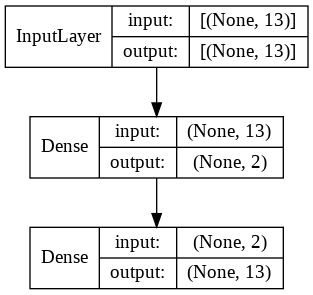

In [16]:
model = models.Sequential()
# https://www.tensorflow.org/api_docs/python/tf/keras/activations   # network.add( layers.Dense(2, activation='relu', input_shape=(12,) ) )
model.add( layers.Dense(2, activation='linear', input_shape=(ONE_HOT_DIM,) ) )
model.add( layers.Dense(ONE_HOT_DIM, activation='softmax' ) )
model.compile( optimizer='rmsprop', 
                 loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'] )
plot_model(model, show_shapes=1, show_dtype=0,show_layer_names=0)              # plot_model(model, show_shapes=1, show_layer_names=1)

In [17]:
# %matplotlib inline
# EPOCHS = 100
total_epochs = 0

def model_fit_n_show(model, eps=100, show_plot=False, reset_bias=False):
  global total_epochs
  sttime = time.time()

  if reset_bias:   # make bias zero
    model.layers[0].bias = np.zeros(2).copy()
    model.layers[1].bias = np.zeros(len(vocab)).copy()

  model.fit( X_train, Y_train, epochs=eps, batch_size=1, verbose=0)
  d2 = pd.DataFrame(  model.weights[0].numpy(),  columns = ['x1', 'x2'] )
  w2v_df = pd.concat( [w2idx,d2],axis=1 )

  endtime = time.time()
  total_epochs += eps 
  ttl = f'Epochs={eps} (total={total_epochs}), time={int(endtime-sttime)} sec'

  if show_plot:
    plot_words(w2v_df, ttl)
  
  return model, w2v_df, total_epochs,ttl

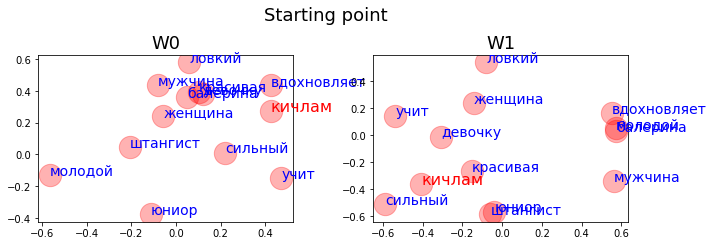

In [18]:
plot_words_v2( vocab, model, ttl='Starting point' )

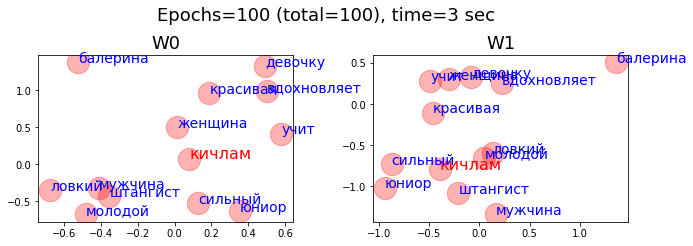

In [19]:
model, w2v_df, total_epochs, ttl = model_fit_n_show(model,eps=100)
plot_words_v2( vocab, model, ttl=ttl )

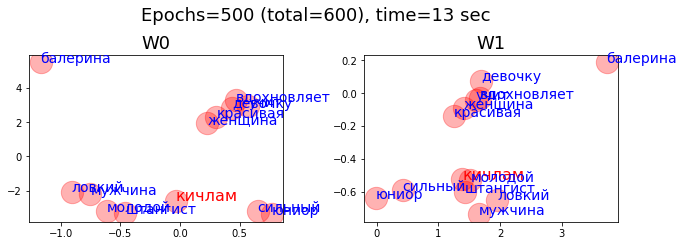

In [20]:
model, w2v_df, total_epochs, ttl = model_fit_n_show(model,eps=500)
plot_words_v2( vocab, model, ttl=ttl )

In [25]:
# W0,W1,b0,b1 = get_weights(model)
# print("b0=",np.round(b0,2), "   b1=",np.round(b1,2))


# Utility Function and Improvements Suggested in [1]

[1] [Distributed Representations of Words and Phrases
and their Compositionality, Mikolov et al , 2013, 10, https://arxiv.org/pdf/1310.4546.pdf](https://arxiv.org/pdf/1310.4546.pdf)

### **Loss Function - Categorical Cross Entropy**

The Skip-Gram Model defines the word embedding using row-vectors of the matrix W0 or (for the context words) using column-vectors of the matrix W1. Given the $t$-th word in the vocabulary an as input word I, let us label the corresponding row of W0 as vector $w_I=w_t$ (embedding vector) and its corresponding column in W1 as $w_O=w_{t+j}$ (context vector) for some $j$ with   $-c\le j\le c,\ j\ne 0$ . 
For example, $w_I=w_t$ is the input (target) word "балерина", and the expected output word is $w_O=w_{t+1}$ "вдохновляет".
We define:
$$ P(w_{t+1} | w_t) = P(w_O | w_I) = \frac{\exp(w_O\cdot w_I)}{\sum_{w\in V } \exp(w\cdot w_I) }
$$
Given a sequence of
training words $w_1, \ w_2, \dots ,  w_T$, the objective of the Skip-gram model is to maximize the average
log probability

$$ U = 
\frac{1}{T} \sum_{t=1}^T  \sum_{  -c\le j\le c,\ j\ne 0} 
\log P(w_{t+j} | w_{t}) =
\frac{1}{T} \sum_{t=1}^T  \sum_{  -c\le j\le c,\ j\ne 0} 
w_{t+j}\cdot w_t - D_t
$$
Where $D_t = \log(\sum_{w\in V } \exp(w\cdot w_t) )$. 
In our example, T=13 is the size of vocabulary $V$.

### **Negative Sampling**

The utility function can be improved by adding penalty for $w_I$ being close negative samples. E.g., we can replace
$\log P(w_O | w_I) $ by 
$$
\log \sigma(w_O\cdot w_I) + 
\sum_{i=1}^k   \mathop{\mathbb{E}}{}_{w_i  \sim P_n(w)} \big[ \log\sigma( - w_i\cdot w_I) \big]
$$
where $k=5$, and $P_n(w) = U(w)^{0.75}$ and $U(w)$ is unigram distribution.

### **Subsampling of Frequent Words**

To counter the imbalance between the rare and frequent words, Mikolov et al [1] discard each word $w$ in the training set with probability 
$$
P(w) = 1-\sqrt{\frac{t}{f(w)}}
$$
where $f(w)$ is the frequency of $w$ and $t=10^{-5}$.

In [21]:
from scipy.special import softmax
# print('yhat=', yhat)
# np.sum(np.exp(yhat)/np.sum(np.exp(yhat))-sftmax_yhat)


def show_dot_products(W0,W1, vocab, i=0):
  vi=W0[i,:]
  print('INPUT   vector=', np.round(vi,2), f'   word={vocab[i]}')

  yhat = np.zeros(len(vocab))
  # print(yhat)
  for k in range(len(vocab)):
    vo = W1.transpose()[k,:]
    yhat[k] = np.dot(vo,vi)
  # print(yhat)

  sftmax_yhat = softmax(yhat)
  print('sftmax_yhat=', np.round(sftmax_yhat,2))
  print()

  for k in range(len(vocab)):
    vo = W1.transpose()[k,:]
    print(f'OUTPUT vector={str(np.round(vo,2)):15}',   
          f'     dot(vo, vi)= {str(np.round(np.dot(vo,vi),2)):7}', 
          f'   prob={100*sftmax_yhat[k]:4.1f}'
          f'   {vocab[k]}'  )


In [23]:
W0,W1,b0,b1 = get_weights(model)
show_dot_products(W0,W1, vocab, i=11)

INPUT   vector= [-0.46 -3.33]    word=штангист
sftmax_yhat= [0.   0.01 0.01 0.02 0.08 0.02 0.1  0.08 0.15 0.16 0.02 0.11 0.23]

OUTPUT vector=[3.73 0.18]          dot(vo, vi)= -2.33      prob= 0.3   балерина
OUTPUT vector=[ 1.67 -0.03]        dot(vo, vi)= -0.67      prob= 1.4   вдохновляет
OUTPUT vector=[1.7  0.07]          dot(vo, vi)= -1.03      prob= 1.0   девочку
OUTPUT vector=[ 1.41 -0.09]        dot(vo, vi)= -0.35      prob= 1.9   женщина
OUTPUT vector=[ 1.38 -0.52]        dot(vo, vi)= 1.11       prob= 8.3   кичлам
OUTPUT vector=[ 1.24 -0.14]        dot(vo, vi)= -0.1       prob= 2.5   красивая
OUTPUT vector=[ 1.95 -0.65]        dot(vo, vi)= 1.26       prob= 9.7   ловкий
OUTPUT vector=[ 1.52 -0.53]        dot(vo, vi)= 1.07       prob= 8.0   молодой
OUTPUT vector=[ 1.65 -0.74]        dot(vo, vi)= 1.69       prob=15.0   мужчина
OUTPUT vector=[ 0.42 -0.59]        dot(vo, vi)= 1.77       prob=16.2   сильный
OUTPUT vector=[ 1.6  -0.04]        dot(vo, vi)= -0.6       prob= 1.5   учит
OU

# MATRIX FACTORIZATION

In [24]:
# adjacency matrix
adjM = []
for w in vocab:
  # print(w)
  row = np.array(np.sum( dfint.loc[ dfint['input'] == w, ['Y_train']], axis=0 ))[0]
  adjM.append(row)
np.asmatrix(adjM)

matrix([[0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]])

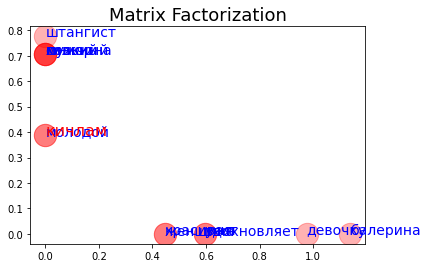

In [25]:
from sklearn.decomposition import NMF
NMF_Model = NMF(n_components=2, init='random', random_state=0)
W = NMF_Model.fit_transform(adjM)
H = NMF_Model.components_
W=pd.DataFrame(W, columns=['x1','x2'])
W['word'] = vocab.copy()
W['values'] =w2v_df['values'].copy()
W = W.reindex(columns=w2v_df.columns)

%matplotlib inline
plot_words(W, ttl='Matrix Factorization')

In [26]:
print(W[['word','x1','x2']])

           word            x1        x2
0      балерина  1.136174e+00  0.000000
1   вдохновляет  5.949282e-01  0.000000
2       девочку  9.753754e-01  0.000000
3       женщина  4.456382e-01  0.000000
4        кичлам  0.000000e+00  0.388167
5      красивая  4.456382e-01  0.000000
6        ловкий  0.000000e+00  0.707590
7       молодой  0.000000e+00  0.388167
8       мужчина  0.000000e+00  0.707590
9       сильный  1.299494e-09  0.707571
10         учит  5.949282e-01  0.000000
11     штангист  0.000000e+00  0.776334
12        юниор  5.272011e-10  0.707571


# SVD

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [27]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
# X = sparse_random(100, 100, density=0.01, format='csr', random_state=42)
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
svd.fit(adjM)
print('svd.explained_variance_ratio_ = ', svd.explained_variance_ratio_)
print('svd.explained_variance_ratio_.sum() = ',  svd.explained_variance_ratio_.sum())
print('svd.singular_values_ = ',  svd.singular_values_)

svd.explained_variance_ratio_ =  [1.92184740e-01 2.20818358e-01 1.58579335e-01 1.17647059e-01
 7.93084724e-02 5.88235294e-02 5.88235294e-02 4.93081288e-02
 3.50950834e-02 2.94117647e-02 9.81613104e-35 6.73293010e-37]
svd.explained_variance_ratio_.sum() =  0.9999999999999998
svd.singular_values_ =  [3.64575131e+00 3.54915649e+00 2.33812224e+00 2.00000000e+00
 1.64575131e+00 1.41421356e+00 1.41421356e+00 1.31266352e+00
 1.10162927e+00 1.00000000e+00 5.79482171e-17 4.78472866e-18]


# COMPUTE SOFTMAX

In [28]:
W0=(model.layers[0].get_weights()[0])
W1=(model.layers[1].get_weights()[0])
# # print("W0=",W0)
# # print("W1=",W1)
# print("W0=",np.round(W0,1))
# print("W1=",np.round(W1,1))

b0 = np.asarray(model.layers[0].bias).astype(float)
b1 = np.asarray(model.layers[1].bias).astype(float)
# # print("b0=",b0)
# # print("b1=",b1)
# print("b0=",np.round(b0,1))
# print("b1=",np.round(b1,1))

i=0
# x = w2v_df.loc[i, ['x1', 'x2'] ].astype(float)
# x = dfint.iloc[i, ['X_train'] ].astype(float)
x=dfint.X_train[i]
print('x=', x)
y=dfint.Y_train[i]
print('y=', y)



np.set_printoptions(precision=5)

yhat = np.matmul( np.matmul(x,W0)+b0,  W1 ) + b1
from scipy.special import softmax
print('yhat=', yhat)

sftmax_yhat = softmax(yhat)
print('sftmax_yhat=', sftmax_yhat)

np.sum(np.exp(yhat)/np.sum(np.exp(yhat))-sftmax_yhat)

x= [1 0 0 0 0 0 0 0 0 0 0 0 0]
y= [0 1 0 0 0 0 0 0 0 0 0 0 0]
yhat= [-6.39161 -5.89049 -4.65538 -5.79988 -8.03252 -5.805   -8.71499 -8.21917
 -9.0406  -6.64941 -5.84924 -7.74697 -6.65056]
sftmax_yhat= [0.06259 0.10331 0.35525 0.11311 0.01213 0.11253 0.00613 0.01006 0.00443
 0.04837 0.10766 0.01614 0.04831]


-2.0816681711721685e-17

In [29]:
dfint

,input,label,X_train,Y_train
0,балерина,вдохновляет,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,балерина,девочку,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,вдохновляет,балерина,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,вдохновляет,девочку,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,девочку,балерина,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,девочку,вдохновляет,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,кичлам,сильный,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
7,кичлам,ловкий,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
8,сильный,кичлам,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
9,сильный,ловкий,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"


In [30]:
# model.get_weights()
# model.weights

In [31]:
# # https://ai-pool.com/d/how-to-get-the-weights-of-keras-model-
# for layer in model.layers:
#     weights = layer.get_weights() # list

# from keras.models import Sequential
# model = Sequential()
# weights = model.get_weights() # returs a numpy list of weights  




In [32]:
W0=(model.layers[0].get_weights()[0])
W1=(model.layers[1].get_weights()[0])
# print("W0=",W0)
# print("W1=",W1)
print("W0=",np.round(W0,1))
print("W1=",np.round(W1,1))

b0 = np.asarray(model.layers[0].bias).astype(float)
b1 = np.asarray(model.layers[1].bias).astype(float)
# print("b0=",b0)
# print("b1=",b1)
print("b0=",np.round(b0,1))
print("b1=",np.round(b1,1))


W0= [[-1.2  5.5]
 [ 0.5  3.3]
 [ 0.4  2.8]
 [ 0.2  1.9]
 [-0.  -2.6]
 [ 0.3  2.3]
 [-0.9 -2.1]
 [-0.6 -3.2]
 [-0.8 -2.2]
 [ 0.7 -3.2]
 [ 0.6  2.9]
 [-0.5 -3.3]
 [ 0.8 -3.4]]
W1= [[ 3.7  1.7  1.7  1.4  1.4  1.2  2.   1.5  1.7  0.4  1.6  1.4 -0. ]
 [ 0.2 -0.   0.1 -0.1 -0.5 -0.1 -0.6 -0.5 -0.7 -0.6 -0.  -0.6 -0.6]]
b0= [-0.3 -0.1]
b1= [-1.8 -3.2 -2.5 -3.2 -3.1 -3.2 -2.3 -3.1 -2.6 -2.8 -3.2 -2.4 -3.2]


In [33]:
# bias.value
# W0

In [34]:
# d2 = pd.DataFrame(  model.weights[0].numpy(),  columns = ['x1', 'x2'] )
d2 = pd.DataFrame(  np.round(W0,1),  columns = ['x1', 'x2'] )
w2v_df = pd.concat( [w2idx,d2],axis=1 )
w2v_df[['word',	'x1',	'x2']]

,word,x1,x2
0,балерина,-1.2,5.5
1,вдохновляет,0.5,3.3
2,девочку,0.4,2.8
3,женщина,0.2,1.9
4,кичлам,-0.0,-2.6
5,красивая,0.3,2.3
6,ловкий,-0.9,-2.1
7,молодой,-0.6,-3.2
8,мужчина,-0.8,-2.2
9,сильный,0.7,-3.2


In [35]:
X_train[0].astype(int)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def nearby_vectors(u,v, sign=1):
  uv = np.dot(u,v)
  siguv = sigmoid(sign*uv)
  logsiguv = np.log(siguv)
  print( 'u=',u,  '  v=',v)
  if sign==1:
      print( f'uv={np.round(uv,1)}, sig(uv)={siguv}, log(sig(uv))={logsiguv}')
  if sign == -1:
      print( f'uv={np.round(uv,1)}, sig(-uv)={siguv}, log(sig(-uv))={logsiguv}')
  return uv, siguv, logsiguv

x=np.array([1.1, -3.9])  # балерина
y=np.array([0.1, -4])    # девочку

noise_x = np.array([ [-0.1,3.2], [-0.2,2.8]  ])
xn0 = noise_x[0]

print('GOOD SOLUTION:')
nearby_vectors(x,y)
nearby_vectors(x, xn0, sign=-1)

print('\nBAD SOLUTION:')
nearby_vectors(x,y,-1)
nearby_vectors(x, xn0, sign=1)
a=2

GOOD SOLUTION:
u= [ 1.1 -3.9]   v= [ 0.1 -4. ]
uv=15.7, sig(uv)=0.9999998496049218, log(sig(uv))=-1.5039508947828205e-07
u= [ 1.1 -3.9]   v= [-0.1  3.2]
uv=-12.6, sig(-uv)=0.9999965941070496, log(sig(-uv))=-3.405898750514251e-06

BAD SOLUTION:
u= [ 1.1 -3.9]   v= [ 0.1 -4. ]
uv=15.7, sig(-uv)=1.5039507824588425e-07, log(sig(-uv))=-15.71000015039509
u= [ 1.1 -3.9]   v= [-0.1  3.2]
uv=-12.6, sig(uv)=3.405892950506343e-06, log(sig(uv))=-12.59000340589875


In [37]:
# import nltk
# from nltk import tokenize
# tokenize.sent_tokenize(p)



In [38]:
np.asarray(w2v_df['word'])

array(['балерина', 'вдохновляет', 'девочку', 'женщина', 'кичлам',
       'красивая', 'ловкий', 'молодой', 'мужчина', 'сильный', 'учит',
       'штангист', 'юниор'], dtype=object)

In [39]:
# [(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences


[['балерина', 'вдохновляет', 'девочку'],
 ['кичлам', 'сильный', 'ловкий'],
 ['штангист', 'сильный', 'мужчина'],
 ['балерина', 'красивая', 'женщина'],
 ['юниор', 'ловкий', 'штангист'],
 ['юниор', 'молодой', 'мужчина'],
 ['девочку', 'учит', 'балерина']]

In [40]:

sentences

[['балерина', 'вдохновляет', 'девочку'],
 ['кичлам', 'сильный', 'ловкий'],
 ['штангист', 'сильный', 'мужчина'],
 ['балерина', 'красивая', 'женщина'],
 ['юниор', 'ловкий', 'штангист'],
 ['юниор', 'молодой', 'мужчина'],
 ['девочку', 'учит', 'балерина']]

In [43]:
ww=set();
[ww.union((set(ss))) for ss in [s.split(' ') for s in corpus]]

[{'балерина', 'вдохновляет', 'девочку'},
 {'кичлам', 'ловкий', 'сильный'},
 {'мужчина', 'сильный', 'штангист'},
 {'балерина', 'женщина', 'красивая'},
 {'ловкий', 'штангист', 'юниор'},
 {'молодой', 'мужчина', 'юниор'},
 {'балерина', 'девочку', 'учит'}]

In [44]:
np.round(np.matmul(W0,W1), 1)

array([[-3.4, -2.1, -1.6, -2.1, -4.5, -2.2, -5.8, -4.7, -6. , -3.7, -2.1,
        -5. , -3.5],
       [ 2.4,  0.7,  1. ,  0.4, -1.1,  0.1, -1.2, -1. , -1.6, -1.7,  0.6,
        -1.3, -2.1],
       [ 2.1,  0.6,  0.9,  0.4, -0.9,  0.1, -1. , -0.8, -1.4, -1.5,  0.6,
        -1.1, -1.8],
       [ 1.2,  0.3,  0.5,  0.1, -0.7,  0. , -0.8, -0.7, -1. , -1. ,  0.3,
        -0.8, -1.2],
       [-0.6,  0. , -0.3,  0.2,  1.3,  0.3,  1.6,  1.3,  1.8,  1.5,  0. ,
         1.5,  1.7],
       [ 1.6,  0.4,  0.7,  0.2, -0.8,  0.1, -0.9, -0.7, -1.2, -1.2,  0.4,
        -0.9, -1.5],
       [-3.8, -1.5, -1.7, -1.1, -0.2, -0.8, -0.4, -0.3,  0. ,  0.8, -1.4,
        -0. ,  1.3],
       [-2.9, -0.9, -1.3, -0.6,  0.8, -0.3,  0.9,  0.8,  1.3,  1.6, -0.9,
         1. ,  2. ],
       [-3.2, -1.2, -1.4, -0.9,  0.1, -0.6, -0. ,  0. ,  0.4,  1. , -1.1,
         0.3,  1.4],
       [ 1.8,  1.2,  0.9,  1.2,  2.6,  1.3,  3.4,  2.7,  3.4,  2.2,  1.2,
         2.9,  2. ],
       [ 2.7,  0.9,  1.2,  0.5, -0.7,  0.3, -0.8, 